<a href="https://colab.research.google.com/github/LokeRuiKee/ml-dl-playground/blob/main/Optimization_Naive_Bayes%2C_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization (Naive Bayes)

26/4/2024: this colab is an extracted part from a bigger project. Extraction is made such that it focus only on the demonstrating the optimization procedures done.

## cross-validation on nb_classifier from Correlation-Based Method

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(nb_classifier, X[selected_features], y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)

# Print the average cross-validation score
print("\nAverage Cross-Validation Score:")
print(cv_scores.mean())

Cross-Validation Scores:
[0.90697674 0.90697674 1.         1.         0.95348837]

Average Cross-Validation Score:
0.9534883720930232


## find the best var_smoothing value for nb_classifier

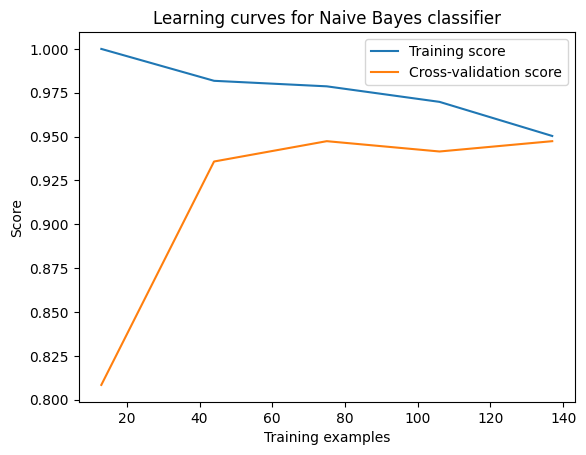


Best Parameters for Naive Bayes:  {'var_smoothing': 0.0023101297000831605}
Best Score for Naive Bayes:  0.9648739495798321


In [ ]:
from sklearn.model_selection import learning_curve, GridSearchCV
import numpy as np

# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(nb_classifier, X_train[selected_features], y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.title('Learning curves for Naive Bayes classifier')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Define the parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Perform grid search on Naive Bayes
grid_search_nb = GridSearchCV(nb_classifier, param_grid_nb, cv=5)
grid_search_nb.fit(X_train[selected_features], y_train)

# Print the best parameters and the best score
print("\nBest Parameters for Naive Bayes: ", grid_search_nb.best_params_)
print("Best Score for Naive Bayes: ", grid_search_nb.best_score_)

## train nb_classifier2 with the best var_smoothing value

In [ ]:
# Train a Naive Bayes classifier on the selected features with the optimal var_smoothing
nb_classifier2 = GaussianNB(var_smoothing=0.0023101297000831605)
nb_classifier2.fit(X_train[selected_features], y_train)

# Make predictions on the test data
y_pred = nb_classifier2.predict(X_test[selected_features])

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix and accuracy
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the accuracy
print(f"\nAccuracy: {accuracy:.2f}")


Confusion Matrix:
[[28  0  0]
 [ 0  8  0]
 [ 1  0  6]]

Classification Report:
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00         8
           3       1.00      0.86      0.92         7

    accuracy                           0.98        43
   macro avg       0.99      0.95      0.97        43
weighted avg       0.98      0.98      0.98        43


Accuracy: 0.98


## cross-validation with nb_classifier2

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the Naive Bayes classifier with the optimal var_smoothing
scores = cross_val_score(nb_classifier2, X_train[selected_features], y_train, cv=5)

# Print the cross-validation scores and the average score
print("Cross-Validation Scores: ", scores)
print("Average Cross-Validation Score: ", scores.mean())

Cross-Validation Scores:  [0.97142857 1.         1.         0.94117647 0.91176471]
Average Cross-Validation Score:  0.9648739495798321


# Optimization (Random Forest)

## Evaluating Random Forest Model (before Optimization)

Accuracy: 1.00
Sensitivity: 1.00
Specificity: 1.00
F1 Score: 1.00
Training examples: 2236, Training score: 1.00, Cross-validation score: 0.88
Training examples: 7568, Training score: 1.00, Cross-validation score: 0.91
Training examples: 12900, Training score: 1.00, Cross-validation score: 0.92
Training examples: 18232, Training score: 1.00, Cross-validation score: 0.92
Training examples: 23564, Training score: 1.00, Cross-validation score: 0.93


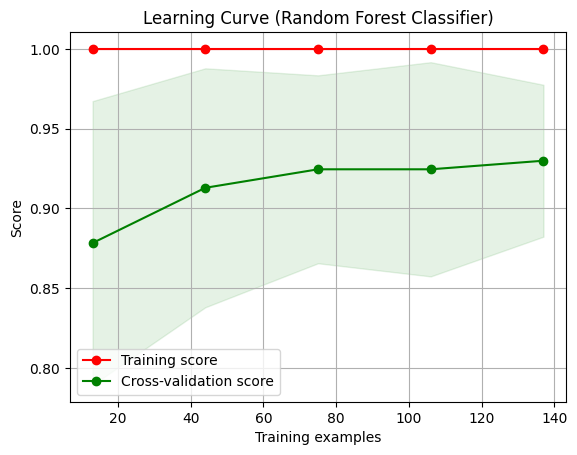

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

from sklearn.metrics import recall_score

# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, y_pred, average='weighted')
print(f"Sensitivity: {sensitivity:.2f}")

from sklearn.metrics import confusion_matrix

# Calculate specificity for a multi-class classification
conf_matrix = confusion_matrix(y_test, y_pred)
num_classes = len(conf_matrix)

specificities = []

for i in range(num_classes):
    true_negative = sum(conf_matrix[j, k] for j in range(num_classes) if j != i for k in range(num_classes) if k != i)
    false_positive = sum(conf_matrix[j, i] for j in range(num_classes) if j != i)

    specificity_i = true_negative / (true_negative + false_positive)
    specificities.append(specificity_i)

# Take the average specificity across all classes
average_specificity = sum(specificities) / num_classes
print(f"Specificity: {average_specificity:.2f}")

from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")

# Function to plot learning curve with numerical scores
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

    # Print numerical scores
    for size, train_score, test_score in zip(train_sizes, train_scores_mean, test_scores_mean):
        print(f"Training examples: {int(size * len(X))}, Training score: {train_score:.2f}, Cross-validation score: {test_score:.2f}")

    return plt

# Plot learning curve
title = "Learning Curve (Random Forest Classifier)"
plot_learning_curve(rf_classifier, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Use the best parameters to create the optimized model
optimized_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
optimized_rf_classifier.fit(X_train, y_train)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}


RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=150, random_state=42)

### comparison

In [ ]:
# Original Random Forest Classifier
print("Original Random Forest Classifier:")
print("Training examples:", len(X_train))
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", average_specificity)
print("F1 Score:", f1)

# Optimized Random Forest Classifier
print("\nOptimized Random Forest Classifier:")
# Evaluate the model on the test set
y_optimized_pred = optimized_rf_classifier.predict(X_test)

# Calculate metrics for the optimized model
optimized_accuracy = accuracy_score(y_test, y_optimized_pred)
optimized_sensitivity = recall_score(y_test, y_optimized_pred, average='weighted')

# Calculate specificity for the optimized model
optimized_conf_matrix = confusion_matrix(y_test, y_optimized_pred)
optimized_specificities = []
for i in range(num_classes):
    true_negative = sum(optimized_conf_matrix[j, k] for j in range(num_classes) if j != i for k in range(num_classes) if k != i)
    false_positive = sum(optimized_conf_matrix[j, i] for j in range(num_classes) if j != i)
    specificity_i = true_negative / (true_negative + false_positive)
    optimized_specificities.append(specificity_i)
optimized_average_specificity = sum(optimized_specificities) / num_classes

optimized_f1 = f1_score(y_test, y_optimized_pred, average='weighted')

print("Training examples:", len(X_train))
print("Accuracy:", optimized_accuracy)
print("Sensitivity:", optimized_sensitivity)
print("Specificity:", optimized_average_specificity)
print("F1 Score:", optimized_f1)


Original Random Forest Classifier:
Training examples: 172
Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0
F1 Score: 1.0

Optimized Random Forest Classifier:
Training examples: 172
Accuracy: 0.9767441860465116
Sensitivity: 0.9767441860465116
Specificity: 0.9777777777777779
F1 Score: 0.9760537300316982


Training examples: 2236, Training score: 1.00, Cross-validation score: 0.88
Training examples: 7568, Training score: 1.00, Cross-validation score: 0.91
Training examples: 12900, Training score: 1.00, Cross-validation score: 0.92
Training examples: 18232, Training score: 1.00, Cross-validation score: 0.92
Training examples: 23564, Training score: 1.00, Cross-validation score: 0.93


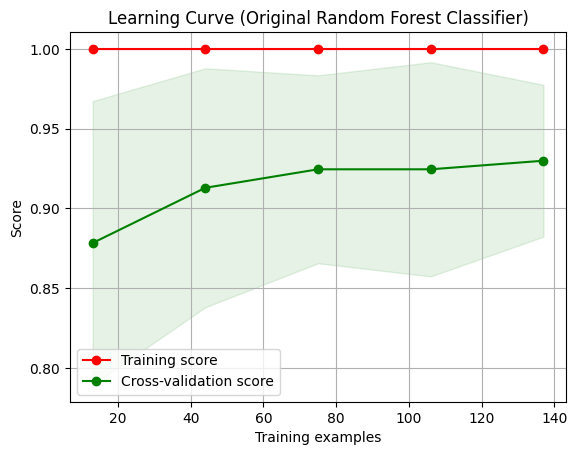

Training examples: 2236, Training score: 0.75, Cross-validation score: 0.71
Training examples: 7568, Training score: 0.99, Cross-validation score: 0.88
Training examples: 12900, Training score: 1.00, Cross-validation score: 0.93
Training examples: 18232, Training score: 0.99, Cross-validation score: 0.92
Training examples: 23564, Training score: 0.99, Cross-validation score: 0.95


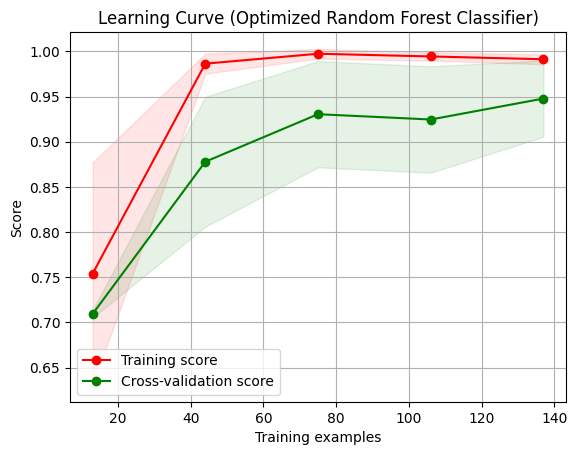

In [ ]:
title = "Learning Curve (Original Random Forest Classifier)"
plot_learning_curve(rf_classifier, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

title = "Learning Curve (Optimized Random Forest Classifier)"
plot_learning_curve(optimized_rf_classifier, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

## Ensemble Techniques



In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

# BaggingClassifier
bagging_classifier = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=100, random_state=42),
                                      n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

# AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=100, random_state=42),
                                         n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)


AdaBoostClassifier(estimator=RandomForestClassifier(random_state=42),
                   random_state=42)

Training examples: 2236, Training score: 0.94, Cross-validation score: 0.82
Training examples: 7568, Training score: 0.98, Cross-validation score: 0.86
Training examples: 12900, Training score: 0.99, Cross-validation score: 0.92
Training examples: 18232, Training score: 1.00, Cross-validation score: 0.94
Training examples: 23564, Training score: 0.99, Cross-validation score: 0.94


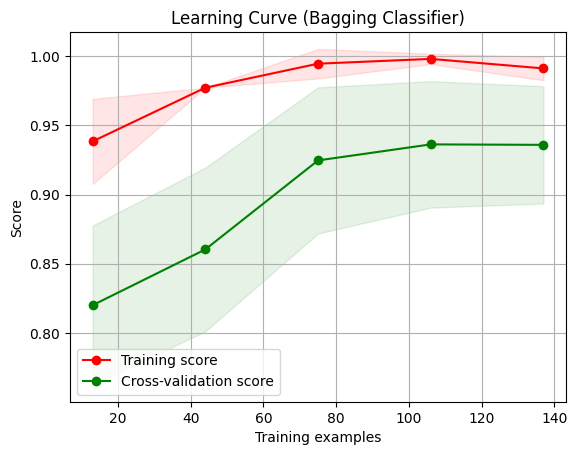

Training examples: 2236, Training score: 1.00, Cross-validation score: 0.88
Training examples: 7568, Training score: 1.00, Cross-validation score: 0.92
Training examples: 12900, Training score: 1.00, Cross-validation score: 0.94
Training examples: 18232, Training score: 1.00, Cross-validation score: 0.93
Training examples: 23564, Training score: 1.00, Cross-validation score: 0.93


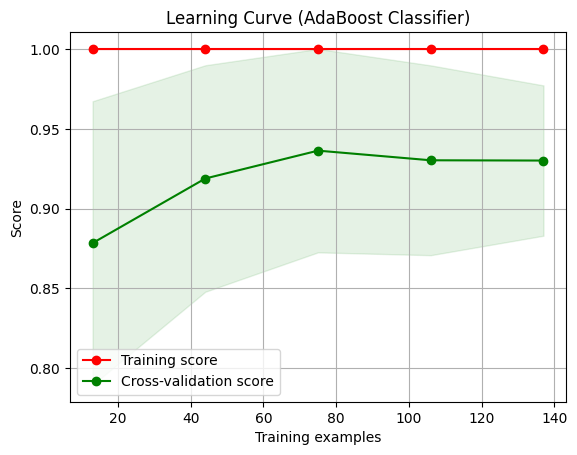

In [ ]:
title = "Learning Curve (Bagging Classifier)"
plot_learning_curve(bagging_classifier, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

title = "Learning Curve (AdaBoost Classifier)"
plot_learning_curve(adaboost_classifier, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score

# Performance metrics for Bagging Classifier
y_bagging_pred = bagging_classifier.predict(X_test)

bagging_accuracy = accuracy_score(y_test, y_bagging_pred)
bagging_sensitivity = recall_score(y_test, y_bagging_pred, average='weighted')

bagging_conf_matrix = confusion_matrix(y_test, y_bagging_pred)
num_classes = len(bagging_conf_matrix)

bagging_specificities = []

for i in range(num_classes):
    true_negative = sum(bagging_conf_matrix[j, k] for j in range(num_classes) if j != i for k in range(num_classes) if k != i)
    false_positive = sum(bagging_conf_matrix[j, i] for j in range(num_classes) if j != i)

    specificity_i = true_negative / (true_negative + false_positive)
    bagging_specificities.append(specificity_i)

bagging_average_specificity = sum(bagging_specificities) / num_classes
bagging_f1 = f1_score(y_test, y_bagging_pred, average='weighted')

print("Bagging Classifier Metrics:")
print(f"Accuracy: {bagging_accuracy:}")
print(f"Sensitivity: {bagging_sensitivity:}")
print(f"Specificity: {bagging_average_specificity:}")
print(f"F1 Score: {bagging_f1:}\n")

# Performance metrics for AdaBoost Classifier
y_adaboost_pred = adaboost_classifier.predict(X_test)

adaboost_accuracy = accuracy_score(y_test, y_adaboost_pred)
adaboost_sensitivity = recall_score(y_test, y_adaboost_pred, average='weighted')

adaboost_conf_matrix = confusion_matrix(y_test, y_adaboost_pred)
adaboost_specificities = []

for i in range(num_classes):
    true_negative = sum(adaboost_conf_matrix[j, k] for j in range(num_classes) if j != i for k in range(num_classes) if k != i)
    false_positive = sum(adaboost_conf_matrix[j, i] for j in range(num_classes) if j != i)

    specificity_i = true_negative / (true_negative + false_positive)
    adaboost_specificities.append(specificity_i)

adaboost_average_specificity = sum(adaboost_specificities) / num_classes
adaboost_f1 = f1_score(y_test, y_adaboost_pred, average='weighted')

print("AdaBoost Classifier Metrics:")
print(f"Accuracy: {adaboost_accuracy:}")
print(f"Sensitivity: {adaboost_sensitivity:}")
print(f"Specificity: {adaboost_average_specificity:}")
print(f"F1 Score: {adaboost_f1:}")

Bagging Classifier Metrics:
Accuracy: 0.9767441860465116
Sensitivity: 0.9767441860465116
Specificity: 0.9777777777777779
F1 Score: 0.9760537300316982

AdaBoost Classifier Metrics:
Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0
F1 Score: 1.0


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_bagging = {
    'estimator__n_estimators': [50, 100, 150],
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'n_estimators': [5, 10, 15]
}

grid_search_bagging = GridSearchCV(
    estimator=BaggingClassifier(estimator=RandomForestClassifier(random_state=42), random_state=42),
    param_grid=param_grid_bagging,
    cv=5,
    scoring='accuracy'
)

grid_search_bagging.fit(X_train, y_train)

best_params_bagging = grid_search_bagging.best_params_
optimized_bagging_classifier = BaggingClassifier(estimator=RandomForestClassifier(random_state=42, **best_params_bagging), random_state=42)
optimized_bagging_classifier.fit(X_train, y_train)

title = "Learning Curve (Bagging Classifier Optimized)"
plot_learning_curve(optimized_bagging_classifier, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()


TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'estimator__max_depth'